In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
# İlk 13 satırı atlayarak Excel dosyasını okuma
df = pd.read_excel("Express Ocak 2024 Maliyet Tablosu (1).xlsx", skiprows=14)

# Sütunları yeniden isimlendirme
yeni_sutun_isimleri = {
    'Unnamed: 0': 'kod',
    'Unnamed: 1': 'mevsim',
    'Unnamed: 2': 'desen',
    'Unnamed: 3': 'ebat',
    'Unnamed: 4': 'liste_fiyat',
    'Unnamed: 5': 'fatura_alti_kdv_haric',
    'Unnamed: 6': 'fatura_alti_kdv_dahil',
    'Unnamed: 8': 'dip_maliyet_kdv_haric',
    'Unnamed: 9': 'dipmaliyet_kdv_dahil2024'
}
# Sütunları yeniden isimlendirme ve 7. sütunu silme
df = df.drop('Unnamed: 7', axis=1)  # 7. sütunu silme
df = df.rename(columns=yeni_sutun_isimleri)


In [286]:
df2 = pd.read_excel("dataframe_final.xlsx")

In [287]:
# Numeric karşılaştırma için kodları sayısal değere çevirme
df['kod'] = pd.to_numeric(df['kod'], errors='coerce')
df2['kod'] = pd.to_numeric(df2['kod'], errors='coerce')

# İki dataframe'deki ortak kodları bulma
ortak_kodlar = set(df['kod']).intersection(set(df2['kod']))

print(f"İki dataframe'de toplam {len(ortak_kodlar)} adet ortak kod bulunmaktadır.")
#ortak kod ayni lastik demektir toplam 1814 adet ortak lastik bulunmaktadır.

İki dataframe'de toplam 1814 adet ortak kod bulunmaktadır.


In [288]:
# Ortak kodları listeye çevirip DataFrame'e dönüştürme
ortak_kodlar_df = pd.DataFrame(list(ortak_kodlar), columns=['kod'])

# df2 ile ortak_kodlar_df'i birleştirme ve sadece ortak kodları tutma
df2_filtered = df2[df2['kod'].isin(ortak_kodlar_df['kod'])]


# df2_filtered'a yeni sütun ekleme
df2_filtered = df2_filtered.merge(
    df[['kod', 'dipmaliyet_kdv_dahil2024']], 
    on='kod', 
    how='left'
)
#ortak lastikler birlestirildi ve hem 2023 hem 2024 maliyetleri ile beraber gosterildi.


Mevsim yaz iken en sık görülen 5 desen:
-------------------------------------
desen
PRIMACY 4+ MI        118
CROSSCLIMATE 2 MI     83
PILOT SPORT 4 S       75
PILOT SPORT 5 MI      47
PILOT SPORT 4 SUV     39
Name: count, dtype: int64
-------------------------------------
Mevsim kis iken en sık görülen 5 desen ve ortalama maliyetleri:
-------------------------------------
                      Frekans  Ort. Maliyet
desen                                      
ALPIN 6                    56       2706.50
PILOT ALPIN 5 SUV MI       47       6784.75
PILOT ALPIN PA4 GRNX       26       6646.57
PILOT ALPIN 5              25       4080.13
PILOT ALPIN 5 MI           20       5811.11

Mevsim yaz iken en sık görülen 5 desen ve ortalama maliyetleri:
-------------------------------------
                   Frekans  Ort. Maliyet
desen                                   
PRIMACY 4+ MI          118       2954.02
CROSSCLIMATE 2 MI       83       3198.54
PILOT SPORT 4 S         75       6335.48
PILOT SPO

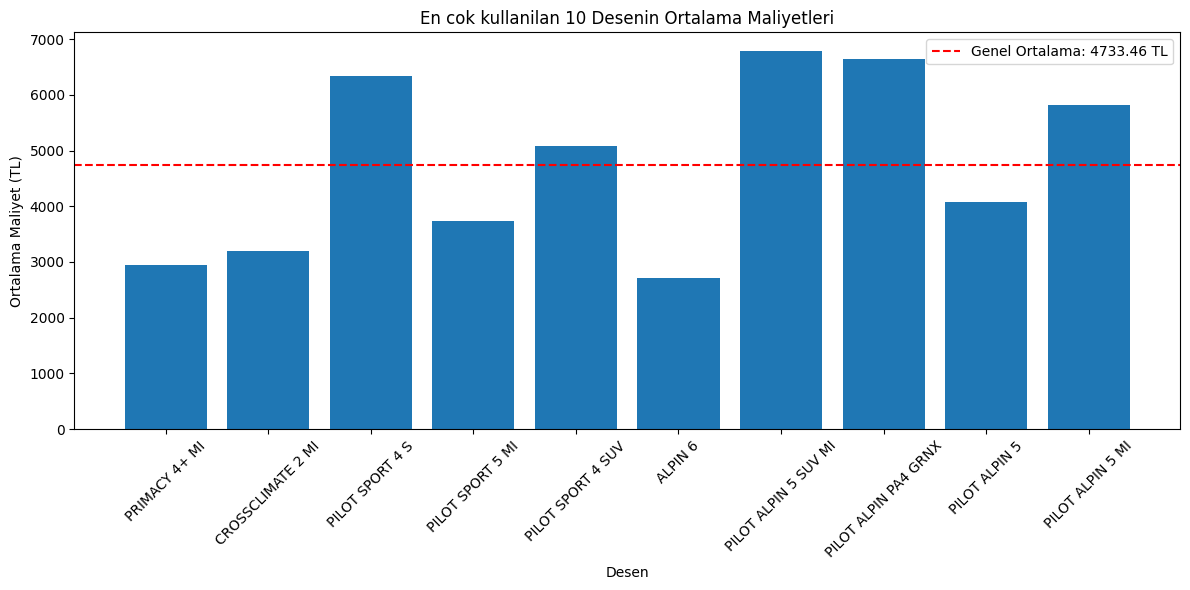

In [307]:
# Mevsim 1 olan lastiklerin desen değerlerinin frekansını hesaplama
mevsim_1_desenler = df2[df2['mevsim'] == 1]['desen'].value_counts().head()

print("Mevsim yaz iken en sık görülen 5 desen:")
print("-------------------------------------")
print(mevsim_1_desenler)
print("-------------------------------------")


mevsim_0_desenler = df2[df2['mevsim'] == 0]['desen'].value_counts().head()

print("Mevsim kis iken en sık görülen 5 desen ve ortalama maliyetleri:")
print("-------------------------------------")
kis_desen_maliyet = df2[df2['mevsim'] == 0].groupby('desen')['Maliyet_kdv_dahil'].mean()
kis_desen_maliyet = kis_desen_maliyet[mevsim_0_desenler.index]
print(pd.DataFrame({
    'Frekans': mevsim_0_desenler,
    'Ort. Maliyet': kis_desen_maliyet.round(2)
}))

print("\nMevsim yaz iken en sık görülen 5 desen ve ortalama maliyetleri:")
print("-------------------------------------")
yaz_desen_maliyet = df2[df2['mevsim'] == 1].groupby('desen')['Maliyet_kdv_dahil'].mean()
yaz_desen_maliyet = yaz_desen_maliyet[mevsim_1_desenler.index]

# Yaz lastikleri için DataFrame oluşturma
yaz_df = pd.DataFrame({
    'Frekans': mevsim_1_desenler,
    'Ort. Maliyet': yaz_desen_maliyet.round(2)
})
print(yaz_df)

# Tüm desenlerin ortalama maliyetlerini hesaplama
tum_desenler = pd.concat([
    yaz_df['Ort. Maliyet'].rename('Yaz'),
    kis_df['Ort. Maliyet'].rename('Kış')
])

plt.figure(figsize=(12, 6))
plt.bar(range(len(tum_desenler)), tum_desenler.values)

plt.xlabel('Desen')
plt.ylabel('Ortalama Maliyet (TL)')
plt.title('En cok kullanilan 10 Desenin Ortalama Maliyetleri')
plt.xticks(range(len(tum_desenler)), tum_desenler.index, rotation=45)

# Ortalama değeri hesaplama ve çizgi olarak ekleme
ortalama = tum_desenler.mean()
plt.axhline(y=ortalama, color='r', linestyle='--', label=f'Genel Ortalama: {ortalama:.2f} TL')

plt.legend()
plt.tight_layout()
plt.show()


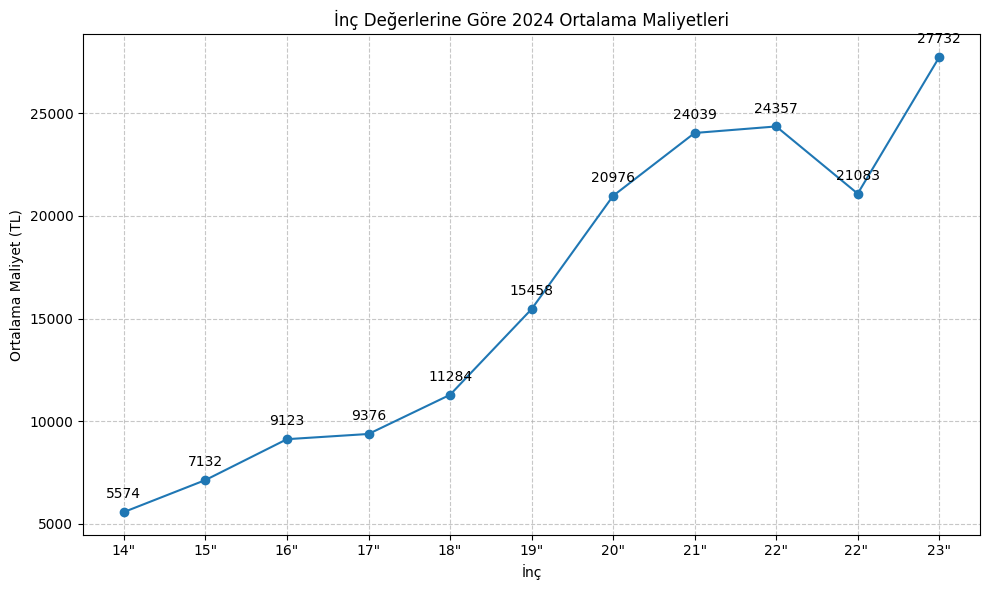

In [290]:
# inc değerlerine göre ortalama 2024 maliyetlerini hesaplama
inc_maliyet_2024 = df2_filtered.groupby('inc')['dipmaliyet_kdv_dahil2024'].mean()

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(inc_maliyet_2024.index, inc_maliyet_2024.values, marker='o')

plt.title('İnç Değerlerine Göre 2024 Ortalama Maliyetleri')
plt.xlabel('İnç')
plt.ylabel('Ortalama Maliyet (TL)')

# Izgara ekle
plt.grid(True, linestyle='--', alpha=0.7)

# Her noktaya değer etiketi ekle
for x, y in zip(inc_maliyet_2024.index, inc_maliyet_2024.values):
    plt.annotate(f'{y:.0f}', 
                (x, y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.tight_layout()
plt.show()


In [291]:
# 2023 ve 2024 arasındaki maliyet artış oranını analiz etme
maliyet_artis = df2_filtered[['Dip_kdvdahil_maliyet2023', 'dipmaliyet_kdv_dahil2024']].mean()
artis_orani = ((maliyet_artis['dipmaliyet_kdv_dahil2024'] - maliyet_artis['Dip_kdvdahil_maliyet2023']) / maliyet_artis['Dip_kdvdahil_maliyet2023']) * 100

# Sonucu yazdırma
print(f"2023 ve 2024 arasındaki maliyet artış oranı: {artis_orani:.2f}%")
# Mevsim değerlerine göre maliyet artış oranını analiz etme
mevsim_artis = df2_filtered.groupby('mevsim')[['Dip_kdvdahil_maliyet2023', 'dipmaliyet_kdv_dahil2024']].mean()
mevsim_artis_orani = ((mevsim_artis['dipmaliyet_kdv_dahil2024'] - mevsim_artis['Dip_kdvdahil_maliyet2023']) / mevsim_artis['Dip_kdvdahil_maliyet2023']) * 100

# Sonuçları yazdırma
print("Mevsimlere Göre Maliyet Artış Oranları:")
print(mevsim_artis_orani)





2023 ve 2024 arasındaki maliyet artış oranı: 218.09%
Mevsimlere Göre Maliyet Artış Oranları:
mevsim
0    225.111267
1    216.090832
dtype: float64


In [292]:

# Seçilen sütunları çıkartma
df2_filtered = df2_filtered.drop([ 'yuk/hiz','desen','liste_kdv_haric', 'liste_kdv_dahil', 'Fatura alti', 'Maliyet_kdv _haric', 'Maliyet_kdv_dahil', 'Servis kampanyasi'], axis=1)
# inc sütununu sayısal değere çevirme
df2_filtered['inc'] = df2_filtered['inc'].str.replace('"', '').astype(float)

df2_filtered.info()
#ise yaramayan sutunlari cikarttik



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   inc                       1814 non-null   float64
 1   kod                       1814 non-null   int64  
 2   ebat                      1814 non-null   object 
 3   mevsim                    1814 non-null   int64  
 4   Dip_kdvdahil_maliyet2023  1814 non-null   float64
 5   dipmaliyet_kdv_dahil2024  1814 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 85.2+ KB


In [293]:
# Ebat sütununu genişlik ve yanak olarak ayırma
df2_filtered['genislik'] = df2_filtered['ebat'].str.extract(r'(\d{3})').iloc[:,0]
df2_filtered['yanak'] = df2_filtered['ebat'].str.extract(r'\d{3}[\s/]?(\d{2})').iloc[:,0]

# Yeni sütunları sayısal değere çevirme
df2_filtered['genislik'] = pd.to_numeric(df2_filtered['genislik'], errors='coerce')
df2_filtered['yanak'] = pd.to_numeric(df2_filtered['yanak'], errors='coerce')

# Ebat sütununu silme
df2_filtered = df2_filtered.drop('ebat', axis=1)
df2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   inc                       1814 non-null   float64
 1   kod                       1814 non-null   int64  
 2   mevsim                    1814 non-null   int64  
 3   Dip_kdvdahil_maliyet2023  1814 non-null   float64
 4   dipmaliyet_kdv_dahil2024  1814 non-null   float64
 5   genislik                  1812 non-null   float64
 6   yanak                     1812 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 99.3 KB


In [294]:
# Null değer içeren satırları silme
df2_filtered = df2_filtered.dropna()

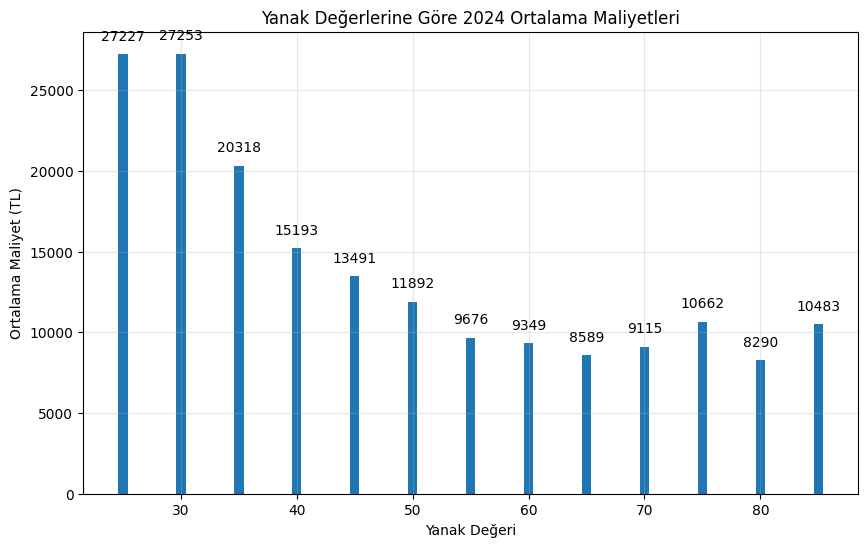


Yanak Değerlerine Göre 2024 Ortalama Maliyetleri:
yanak
25.0    27226.863158
30.0    27253.342373
35.0    20317.962162
40.0    15193.183099
45.0    13491.160563
50.0    11892.381818
55.0     9676.250220
60.0     9348.600000
65.0     8589.043200
70.0     9114.953846
75.0    10662.400000
80.0     8289.600000
85.0    10483.200000
Name: dipmaliyet_kdv_dahil2024, dtype: float64


In [295]:
# Yanak değerlerine göre 2024 maliyet ortalamaları
yanak_maliyet_2024 = df2_filtered.groupby('yanak')['dipmaliyet_kdv_dahil2024'].mean()

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(yanak_maliyet_2024.index, yanak_maliyet_2024.values)
plt.title('Yanak Değerlerine Göre 2024 Ortalama Maliyetleri')
plt.xlabel('Yanak Değeri')
plt.ylabel('Ortalama Maliyet (TL)')

# Her çubuğun üzerine değer etiketi ekleme
for x, y in zip(yanak_maliyet_2024.index, yanak_maliyet_2024.values):
    plt.annotate(f'{y:.0f}', 
                (x, y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.grid(True, alpha=0.3)
plt.show()

# Sayısal değerleri gösterme
print("\nYanak Değerlerine Göre 2024 Ortalama Maliyetleri:")
print(yanak_maliyet_2024)


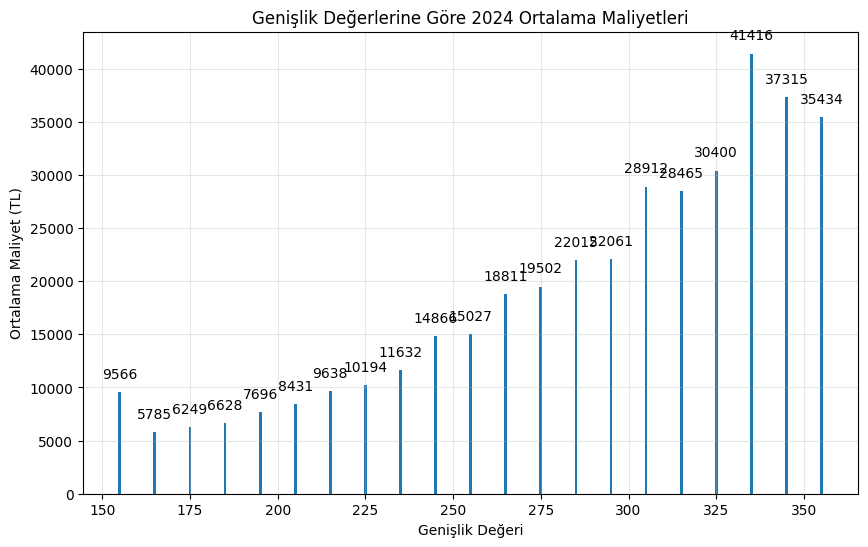


Genişlik Değerlerine Göre 2024 Ortalama Maliyetleri:
genislik
155.0     9566.400000
165.0     5785.200000
175.0     6248.571429
185.0     6627.600000
195.0     7695.887324
205.0     8431.062857
215.0     9638.264789
225.0    10193.853394
235.0    11631.673934
245.0    14866.326486
255.0    15026.962679
265.0    18811.200000
275.0    19501.966667
285.0    22014.986667
295.0    22060.517647
305.0    28911.851163
315.0    28465.010526
325.0    30400.000000
335.0    41416.145455
345.0    37314.600000
355.0    35433.600000
Name: dipmaliyet_kdv_dahil2024, dtype: float64


In [296]:
# Genişlik değerlerine göre 2024 maliyet ortalamaları
genislik_maliyet_2024 = df2_filtered.groupby('genislik')['dipmaliyet_kdv_dahil2024'].mean()

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(genislik_maliyet_2024.index, genislik_maliyet_2024.values)
plt.title('Genişlik Değerlerine Göre 2024 Ortalama Maliyetleri')
plt.xlabel('Genişlik Değeri')
plt.ylabel('Ortalama Maliyet (TL)')

# Her çubuğun üzerine değer etiketi ekleme
for x, y in zip(genislik_maliyet_2024.index, genislik_maliyet_2024.values):
    plt.annotate(f'{y:.0f}', 
                (x, y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')

plt.grid(True, alpha=0.3)
plt.show()

# Sayısal değerleri gösterme
print("\nGenişlik Değerlerine Göre 2024 Ortalama Maliyetleri:")
print(genislik_maliyet_2024)


In [297]:
df2_filtered.corr().style.background_gradient(cmap='coolwarm')


,inc,kod,mevsim,Dip_kdvdahil_maliyet2023,dipmaliyet_kdv_dahil2024,genislik,yanak
inc,1.000000,-0.032181,-0.015880,0.758812,0.728096,0.781579,-0.746683
kod,-0.032181,1.000000,0.001967,-0.045970,-0.045418,-0.044809,0.035303
mevsim,-0.015880,0.001967,1.000000,-0.004671,-0.027910,0.028537,-0.050461
Dip_kdvdahil_maliyet2023,0.758812,-0.045970,-0.004671,1.000000,0.992280,0.815806,-0.679691
dipmaliyet_kdv_dahil2024,0.728096,-0.045418,-0.027910,0.992280,1.000000,0.807257,-0.665237
genislik,0.781579,-0.044809,0.028537,0.815806,0.807257,1.000000,-0.707855
yanak,-0.746683,0.035303,-0.050461,-0.679691,-0.665237,-0.707855,1.000000


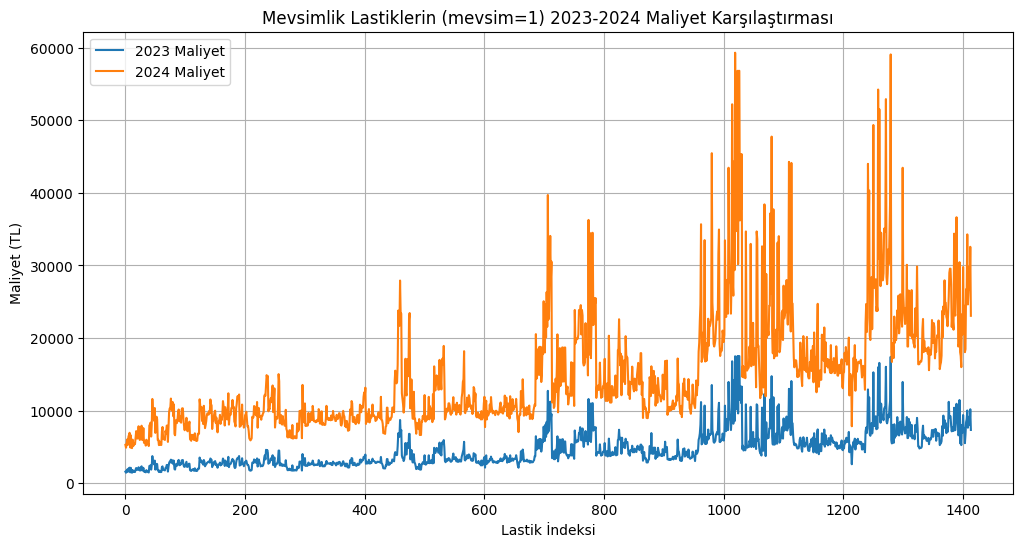

In [298]:
# Mevsim=1 olan lastikleri filtreleme
mevsim_1_lastikler = df2_filtered[df2_filtered['mevsim'] == 1]

# 2023 ve 2024 maliyet karşılaştırma grafiği (Sadece mevsim=1 olanlar için)
plt.figure(figsize=(12, 6))
plt.plot(mevsim_1_lastikler.index, mevsim_1_lastikler['Dip_kdvdahil_maliyet2023'], label='2023 Maliyet')
plt.plot(mevsim_1_lastikler.index, mevsim_1_lastikler['dipmaliyet_kdv_dahil2024'], label='2024 Maliyet')
plt.xlabel('Lastik İndeksi')
plt.ylabel('Maliyet (TL)')
plt.title('Mevsimlik Lastiklerin (mevsim=1) 2023-2024 Maliyet Karşılaştırması')
plt.legend()
plt.grid(True)
plt.show()





In [299]:
# 2023, 2024 ve 2025 yılları için sabit dolar kurları tanımlama
USD_2023 = 18.71  # 2023 Ocak ayı ortalama kur
USD_2024 = 29.92  # 2024 Ocak ayı ortalama kur
USD_2025 = 35.00  # 2025 Ocak ayı ortalama kur (örnek değer)

# Kurları yazdırma
print(f"2023 Ocak Ortalama Dolar Kuru: {USD_2023:.2f} TL")
print(f"2024 Ocak Ortalama Dolar Kuru: {USD_2024:.2f} TL")
print(f"2025 Ocak Ortalama Dolar Kuru: {USD_2025:.2f} TL")


2023 Ocak Ortalama Dolar Kuru: 18.71 TL
2024 Ocak Ortalama Dolar Kuru: 29.92 TL
2025 Ocak Ortalama Dolar Kuru: 35.00 TL



Model Performans Metrikleri:
Ortalama Kare Hata (MSE): 787.24
R-kare (R²) Skoru: 0.99

Model Katsayıları:
Genişlik: 0.1770
Yanak: -0.2579
Maliyet 2023: -10.8103
inc: -15.7704
mevsim: 2.0107
Sabit (Intercept): 174.5347


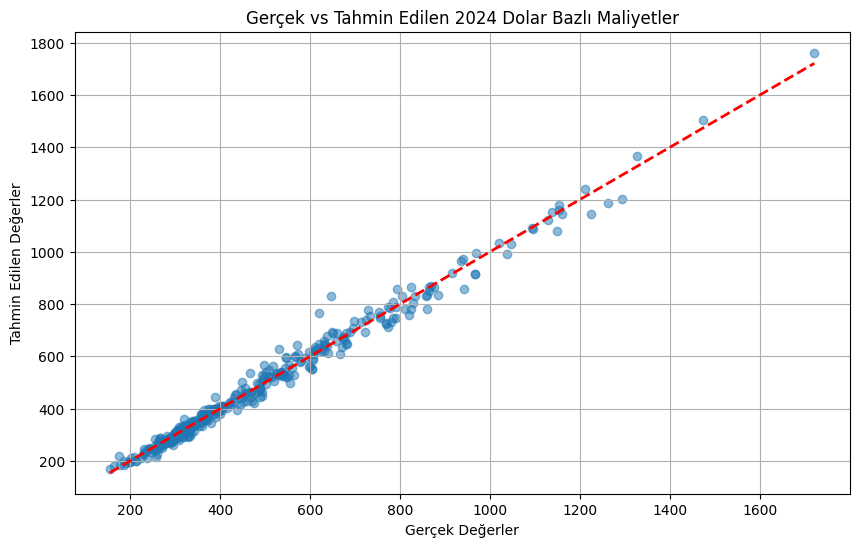

In [308]:
# Dolar bazında maliyet hesaplamaları
# 2023 ve 2024 maliyetlerini dolar bazına dönüştürme
df2_filtered['maliyet_dolar_2023'] = df2_filtered['Dip_kdvdahil_maliyet2023'] / USD_2023
df2_filtered['maliyet_dolar_2024'] = df2_filtered['dipmaliyet_kdv_dahil2024'] / USD_2024

# Gerekli kütüphaneleri içe aktarma
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

# Tahmin için kullanılacak özellikleri seçme
X = df2_filtered[['genislik', 'yanak', 'inc', 'mevsim', 'maliyet_dolar_2023']]
y = df2_filtered['maliyet_dolar_2024']  # Hedef değişken: 2024 dolar bazlı maliyet

# Veri setini eğitim ve test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Doğrusal regresyon modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred_dolar = model.predict(X_test)


# Model performansını değerlendirme
mse = mean_squared_error(y_test, y_pred_dolar)
r2 = r2_score(y_test, y_pred_dolar)

print("\nModel Performans Metrikleri:")
print(f"Ortalama Kare Hata (MSE): {mse:.2f}")
print(f"R-kare (R²) Skoru: {r2:.2f}")

# Model katsayılarını yazdırma
print("\nModel Katsayıları:")
for feature, coef in zip(['Genişlik', 'Yanak', 'Maliyet 2023','inc','mevsim'], model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Sabit (Intercept): {model.intercept_:.4f}")

# Gerçek vs Tahmin grafiği
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dolar, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs Tahmin Edilen 2024 Dolar Bazlı Maliyetler')
plt.grid(True)
plt.show()



Polynomial Regresyon Model Performans Metrikleri:
Ortalama Kare Hata (MSE): 736.64
R-kare (R²) Skoru: 0.99


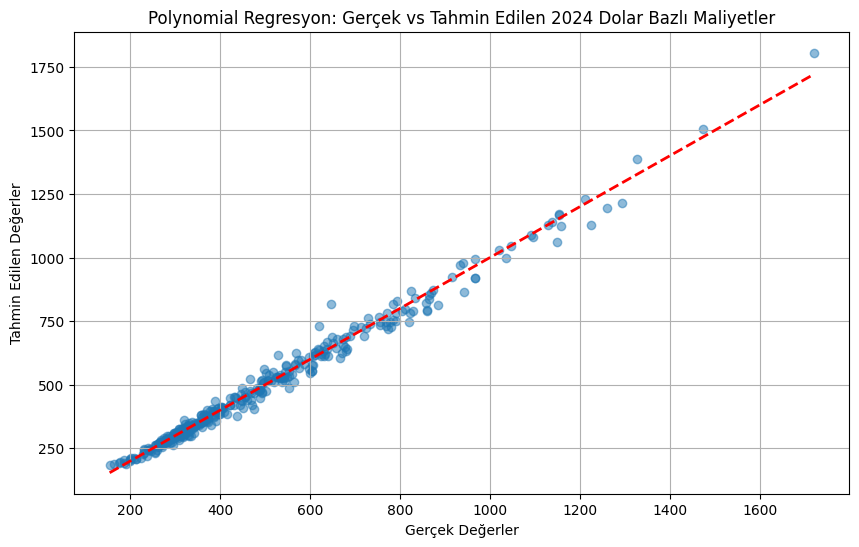

In [301]:
# Polynomial Regresyon için gerekli kütüphaneyi içe aktarma
from sklearn.preprocessing import PolynomialFeatures

# Polynomial özellikleri oluşturma (2. dereceden)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Polynomial regresyon modelini oluşturma ve eğitme
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred_poly = poly_model.predict(X_poly_test)

# Model performansını değerlendirme
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regresyon Model Performans Metrikleri:")
print(f"Ortalama Kare Hata (MSE): {mse_poly:.2f}")
print(f"R-kare (R²) Skoru: {r2_poly:.2f}")

# Gerçek vs Tahmin grafiği (Polynomial)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Polynomial Regresyon: Gerçek vs Tahmin Edilen 2024 Dolar Bazlı Maliyetler')
plt.grid(True)
plt.show()



Gradient Boosting Regresyon Model Performans Metrikleri:
Ortalama Kare Hata (MSE): 903.32
R-kare (R²) Skoru: 0.99


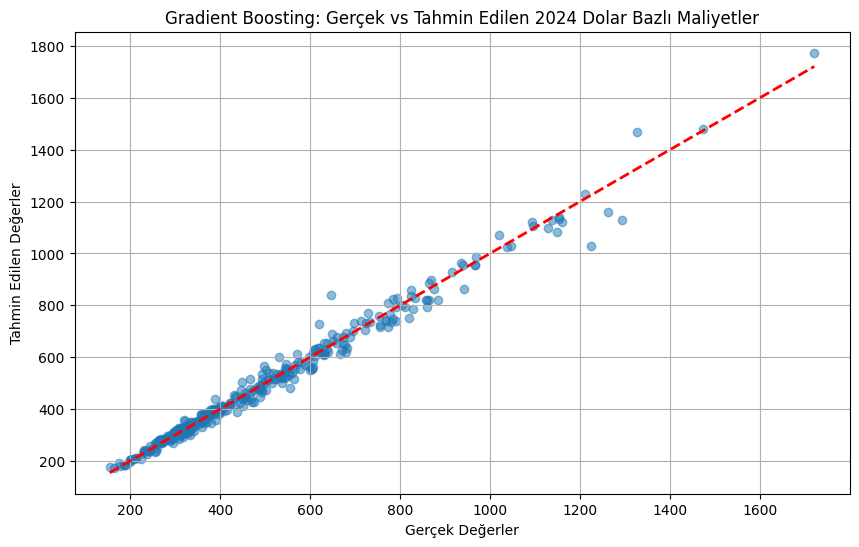

In [302]:
# Gradient Boosting Regressor için gerekli kütüphaneyi içe aktarma
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting modelini oluşturma ve eğitme
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred_gb = gb_model.predict(X_test)

# Model performansını değerlendirme
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regresyon Model Performans Metrikleri:")
print(f"Ortalama Kare Hata (MSE): {mse_gb:.2f}")
print(f"R-kare (R²) Skoru: {r2_gb:.2f}")

# Gerçek vs Tahmin grafiği (Gradient Boosting)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gradient Boosting: Gerçek vs Tahmin Edilen 2024 Dolar Bazlı Maliyetler')
plt.grid(True)
plt.show()



Random Forest Regresyon Model Performans Metrikleri:
Ortalama Kare Hata (MSE): 846.55
R-kare (R²) Skoru: 0.99


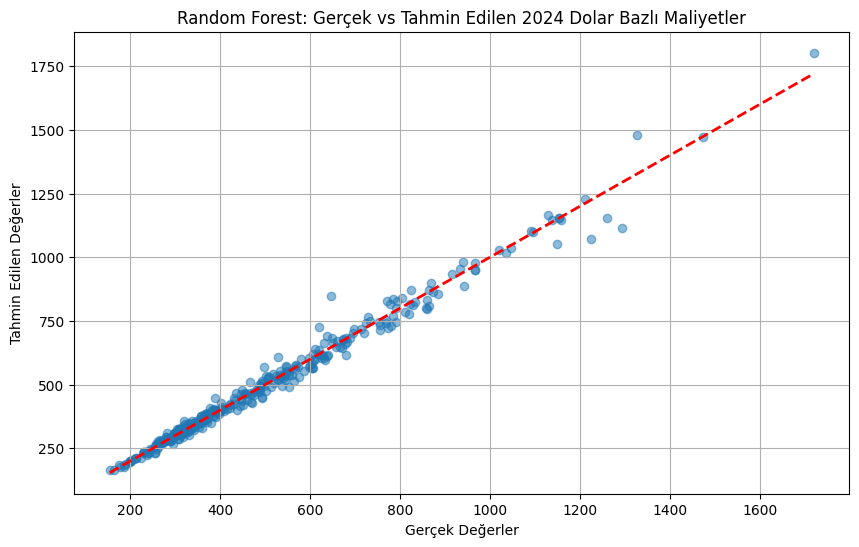

In [303]:
# Random Forest Regressor için gerekli kütüphaneyi içe aktarma
from sklearn.ensemble import RandomForestRegressor

# Random Forest modelini oluşturma ve eğitme
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred_rf = rf_model.predict(X_test)

# Model performansını değerlendirme
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regresyon Model Performans Metrikleri:")
print(f"Ortalama Kare Hata (MSE): {mse_rf:.2f}")
print(f"R-kare (R²) Skoru: {r2_rf:.2f}")

# Gerçek vs Tahmin grafiği (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Random Forest: Gerçek vs Tahmin Edilen 2024 Dolar Bazlı Maliyetler')
plt.grid(True)
plt.show()


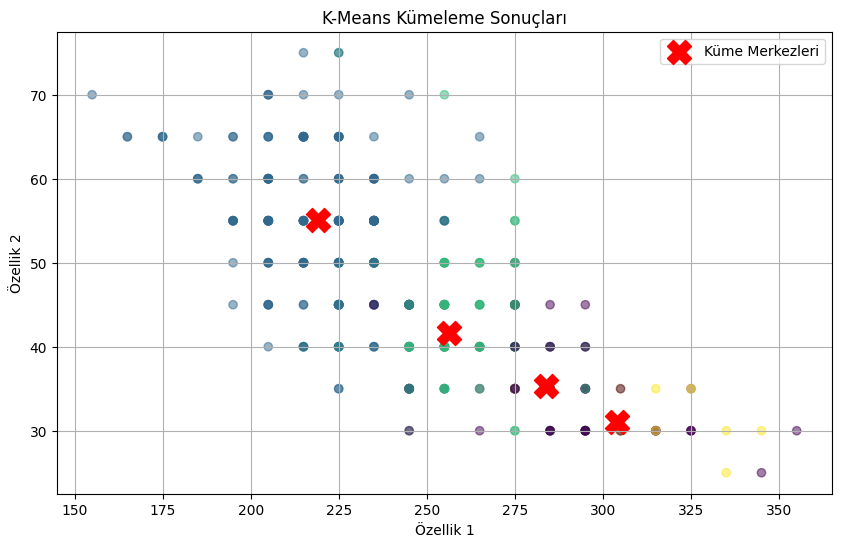


K-Means Kümeleme Model Performans Metrikleri:
Küme Sayısı: 4
Küme Merkezleri: [[283.7755102   35.32312925  20.49659864   0.71428571 391.58037093]
 [219.07407407  55.1037037   16.88         0.8        149.18936759]
 [256.19437939  41.61592506  19.30913349   0.77751756 266.82414969]
 [304.05660377  31.03773585  20.41509434   0.94339623 658.94062745]]


In [309]:
from sklearn.cluster import KMeans

# K-Means algoritması ile kümeleme
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train)

# Küme tahminlerini alma
clusters = kmeans.predict(X_test)

# Küme merkezlerini alma
cluster_centers = kmeans.cluster_centers_

# Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))

# X_test'in uygun şekilde pandas DataFrame'den numpy dizisine dönüştürülmesi
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X', label='Küme Merkezleri')
plt.title('K-Means Kümeleme Sonuçları')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.legend()
plt.grid(True)
plt.show()
print("\nK-Means Kümeleme Model Performans Metrikleri:")
print(f"Küme Sayısı: {kmeans.n_clusters}")
print(f"Küme Merkezleri: {cluster_centers}")


